In [1]:
import pandas as pd
import numpy as np

In [2]:
import json
jsonl_file = "problems_data.jsonl" 
csv_file = "dataset_acm.csv"       


data = []

with open(jsonl_file, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

columns = [
    "title",
    "description",
    "input_description",
    "output_description",
    "problem_class",
    "problem_score"
]

df = df[columns]
df.to_csv(csv_file, index=False)
print("Rows:", len(df))

Rows: 4112


In [3]:
df = pd.read_csv("dataset_acm.csv")
df

,title,description,input_description,output_description,problem_class,problem_score
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,NaN,NaN,hard,9.6
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6
...,...,...,...,...,...,...
4107,Tölvunarfræðingar telja,Computer scientists count a bit different from...,Input consists of one line with one integer $n$.,"Output the $n$-th\n number, according to co...",easy,1.1
4108,Velkomin!,Welcome to Forritunarkeppni Framhaldsskólanna ...,There is no input in this problem.,Print a single line containing VELKOMIN!,easy,1.1
4109,Til hamingju,NaN,There is no input in this problem.,Print a single line containing TIL\n HAMING...,easy,1.1
4110,Hipp Hipp,NaN,There is no input in this problem.,Print 20 lines. Each line should contain Hipp ...,easy,1.1


In [4]:
pd.set_option("display.max_colwidth", None)

print(df.iloc[4108]["description"])
print()




Welcome to Forritunarkeppni Framhaldsskólanna 2021.




In [5]:
pd.set_option("display.max_colwidth", None)
print(df.iloc[4108]["input_description"])
print()


There is no input in this problem.



In [6]:
print(df.iloc[4108]["output_description"])
print()

Print a single line containing VELKOMIN!



## EDA

In [7]:
df["problem_class"].value_counts(normalize=True)


problem_class
hard      0.472033
medium    0.341683
easy      0.186284
Name: proportion, dtype: float64

<Axes: title={'center': 'Problem Class Distribution'}, xlabel='problem_class'>

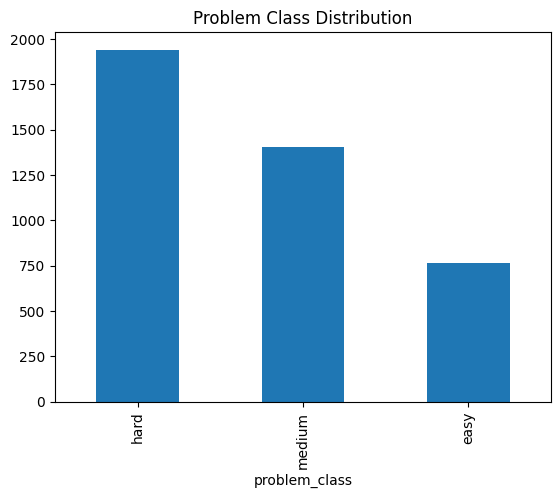

In [8]:
df["problem_class"].value_counts().plot(kind="bar", title="Problem Class Distribution")


In [9]:
df["problem_score"].describe()
import matplotlib.pyplot as plt

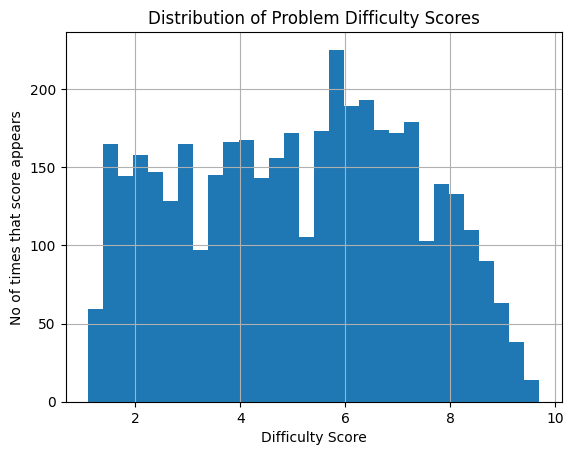

In [10]:
df["problem_score"].hist(bins=30)
plt.title("Distribution of Problem Difficulty Scores")
plt.xlabel("Difficulty Score")
plt.ylabel("No of times that score appears")
plt.show()

In [11]:
df1 = df.copy()

In [12]:
df1["full_text"] = (
    df1["title"].fillna("") + " " +
    df1["description"].fillna("") + " " +
    df1["input_description"].fillna("") + " " +
    df1["output_description"].fillna("")
)


In [13]:
df1["text_length"] = df1["full_text"].str.len()
df1.groupby("problem_class")["text_length"].mean()


problem_class
easy      1289.954308
hard      1761.594024
medium    1619.276157
Name: text_length, dtype: float64

<Axes: xlabel='problem_class', ylabel='text_length'>

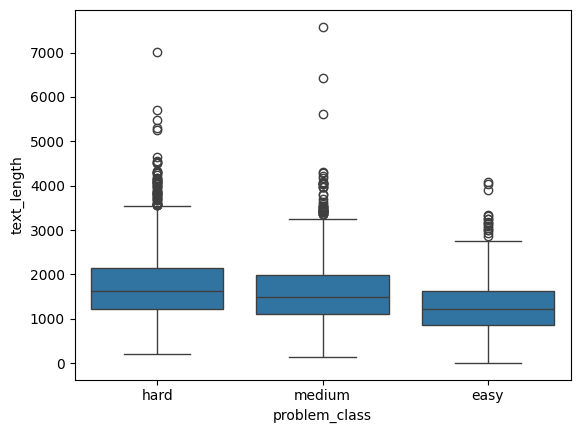

In [14]:
import seaborn as sns
sns.boxplot(x="problem_class", y="text_length", data=df1)


In [15]:
import re

df1["math_symbols"] = df1["full_text"].apply(
    lambda x: len(re.findall(r"[=<>+\-*/^]", x))
)
df1.groupby("problem_class")["math_symbols"].mean()


problem_class
easy      3.390339
hard      4.839773
medium    4.488256
Name: math_symbols, dtype: float64

In [16]:
keywords = ["dp", "graph", "tree", "recursion", "greedy", "modulo"]

for kw in keywords:
    df1[kw] = df1["full_text"].str.lower().str.count(rf"\b{kw}\b")


df1.groupby("problem_class")[keywords].mean()


,dp,graph,tree,recursion,greedy,modulo
problem_class,,,,,,
easy,0.000000,0.010444,0.078329,0.000000,0.002611,0.019582
hard,0.000000,0.127254,0.231324,0.000515,0.006698,0.087069
medium,0.000712,0.076157,0.172954,0.001423,0.008541,0.047687


In [17]:

features = ["text_length", "math_symbols"] + keywords
df1[features + ["problem_score"]].corr()["problem_score"].sort_values(ascending=False)


problem_score    1.000000
text_length      0.230039
math_symbols     0.094463
modulo           0.071972
graph            0.069235
tree             0.058454
greedy           0.007620
recursion        0.001886
dp              -0.003686
Name: problem_score, dtype: float64

In [18]:
df1.columns

Index(['title', 'description', 'input_description', 'output_description',
       'problem_class', 'problem_score', 'full_text', 'text_length',
       'math_symbols', 'dp', 'graph', 'tree', 'recursion', 'greedy', 'modulo'],
      dtype='object')

In [19]:
df.columns

Index(['title', 'description', 'input_description', 'output_description',
       'problem_class', 'problem_score'],
      dtype='object')

In [20]:
df1.groupby("problem_class")["problem_score"].describe()


,count,mean,std,min,25%,50%,75%,max
problem_class,,,,,,,,
easy,766.0,1.970888,0.433289,1.1,1.6,2.0,2.3,2.8
hard,1941.0,7.071149,1.049729,5.5,6.2,7.0,7.9,9.7
medium,1405.0,4.125836,0.774216,2.8,3.5,4.1,4.8,5.5


In [21]:
df.isnull().sum()


title                   0
description            81
input_description     120
output_description    131
problem_class           0
problem_score           0
dtype: int64

In [22]:
df.shape

(4112, 6)

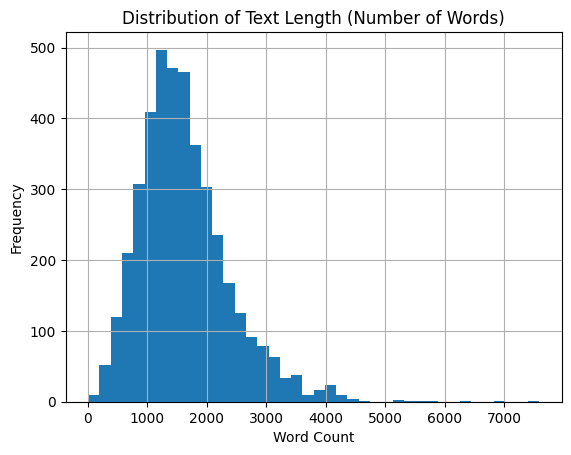

In [23]:

df1["text_length"].hist(bins=40)
plt.title("Distribution of Text Length (Number of Words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib

In [25]:
df["text"] = (
    df["title"].fillna("") + " " +
    df["description"].fillna("") + " " +
    df["input_description"].fillna("") + " " +
    df["output_description"].fillna("")
)


In [26]:
df1["text"] = (
    df1["title"].fillna("") + " " +
    df1["description"].fillna("") + " " +
    df1["input_description"].fillna("") + " " +
    df1["output_description"].fillna("")
)

In [27]:
df1.columns 

Index(['title', 'description', 'input_description', 'output_description',
       'problem_class', 'problem_score', 'full_text', 'text_length',
       'math_symbols', 'dp', 'graph', 'tree', 'recursion', 'greedy', 'modulo',
       'text'],
      dtype='object')

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

In [29]:
X = df1[[
    "text",
    "text_length",
    "math_symbols",
    "dp", "graph", "tree", "recursion", "greedy", "modulo"
]]

y_class = df1["problem_class"]
y_score = np.log1p(df1["problem_score"])

X_train, X_test, y_class_train, y_class_test, y_score_train, y_score_test = train_test_split(
    X, y_class, y_score, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(
            max_features=12000,
            ngram_range=(1,2),
            stop_words="english",
            sublinear_tf=True
        ), "text"),
        
        ("num", Pipeline([
            ("scaler", StandardScaler())
        ]), [
            "text_length", "math_symbols",
            "dp", "graph", "tree", "recursion", "greedy", "modulo"
        ])
    ]
)

clf_pipeline = Pipeline([
    ("features", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=400,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

scores = cross_val_score(
    clf_pipeline,
    X,
    y_class,
    cv=5,
    scoring="accuracy"
)

print(scores)
print("Mean:", scores.mean(), "Std:", scores.std())
clf_pipeline.fit(X_train, y_class_train)
y_class_pred = clf_pipeline.predict(X_test)

print("Classification Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("Confusion Matrix:\n", confusion_matrix(y_class_test, y_class_pred))


[0.49210207 0.527339   0.50486618 0.53527981 0.56690998]
Mean: 0.5252994060658737 Std: 0.02590284914634298
Classification Accuracy: 0.5771567436208992
Confusion Matrix:
 [[ 55  54  27]
 [ 23 364  38]
 [ 24 182  56]]


In [30]:

preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(
            max_features=12000,
            ngram_range=(1,3),
            stop_words="english",
            sublinear_tf=True
        ), "text"),

        ("num", Pipeline([
            ("scaler", StandardScaler())
        ]), [
            "text_length", "math_symbols",
            "dp", "graph", "tree", "recursion", "greedy", "modulo"
        ])
    ]
)

reg_pipeline = Pipeline([
    ("features", preprocessor),
    ("reg", XGBRegressor(
        n_estimators=600,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42
    ))
])

reg_pipeline.fit(X_train, y_score_train)   # ✅ FIXED
y_score_pred = reg_pipeline.predict(X_test)

print("MAE (log-scale):", mean_absolute_error(y_score_test, y_score_pred))
print("RMSE (log-scale):", np.sqrt(mean_squared_error(y_score_test, y_score_pred)))

MAE (log-scale): 0.29403896120503653
RMSE (log-scale): 0.35702773049348596


In [31]:
joblib.dump(clf_pipeline, "classifier.pkl")
joblib.dump(reg_pipeline, "regressor.pkl")

print("Saved")

Saved
